# Sprint 06. Tasca 01. Probabilitat i estadística
## By José Manuel Castaño

## - Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

Agafo el dataset **credit cards customers** amb informació d'usuaris de credit cards, utilitzat a el sprint 05

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
creditcard = pd.read_csv('BankChurners.csv')

Eliminem algunes columnes per recomanació del creador de l'arxiu.
Cambiem alguns noms de les columnes per fer-los més inteligibles i operatius

In [3]:
creditcard.drop(creditcard.columns[[16,19,21,22]], axis='columns', inplace=True)

In [4]:
creditcard.rename(columns={'Total_Relationship_Count':'Total_Products', 'Months_Inactive_12_mon':'Months_Inactive','Contacts_Count_12_mon':'Contacts_Count',
                           'Total_Revolving_Bal':'Revolving', 'Avg_Open_To_Buy':'Open_To_Buy','Total_Trans_Ct':'Transaction_Count','Total_Trans_Amt':'Transaction_Amount',
                           'Avg_Utilization_Ratio':'Utilization_Ratio'}, inplace=True)
creditcard.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Products,Months_Inactive,Contacts_Count,Credit_Limit,Revolving,Open_To_Buy,Transaction_Amount,Transaction_Count,Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


Breu explicació de la base de dades creditcard:   
This dataset consists of 10,000 customers (credit card users) mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.   
Descripció dels camps:
- CLIENTNUM: Id del client
- Attrition_Flag: si el client és nou o ja existent
- Customer_Age: edat del client
- Gender: sexe (Male, Female)
- Dependent_Count: número de persones que depenen del compte
- Education_Level: nivell d'estudis
- Marital_Status: estat civil si es coneix o desconegut
- Income_Category: nivell d'ingressos
- Card_Category: tipo de targeta (Blue, Siver, Gold...)
- Months_on_book: antiguetat al banc en mesos
- Total_Products: número total de productes bancaris contractats
- Months_Inactive: mesos que la targeta ha estat inactiva
- Contacts_count: número de vegades que ha contactat amb el banc
- Credit_limit: límit de credit de la targeta
- Revolving: rati de rotació dels diners
- Open_to_buy: Disposició del client a comprar línia de crèdit (mitjana dels últims 12 mesos)
- Transaction_amount: diners totals utilitzats a les transaccions
- Transaction_Count: número de transaccions realitzades
- Utilization_ratio: ratio de utilització de la targeta

A el sprint anterior ja hem vist les distribucions de les diferents variables, algunes amb gràfics i d'altres numèricament

Selecciono l'atribut **Customer_Age** per tal de calcular la moda, la mediana, la desviació estàndard i la mitjana aritmètica. Abans mirem la seva distribució

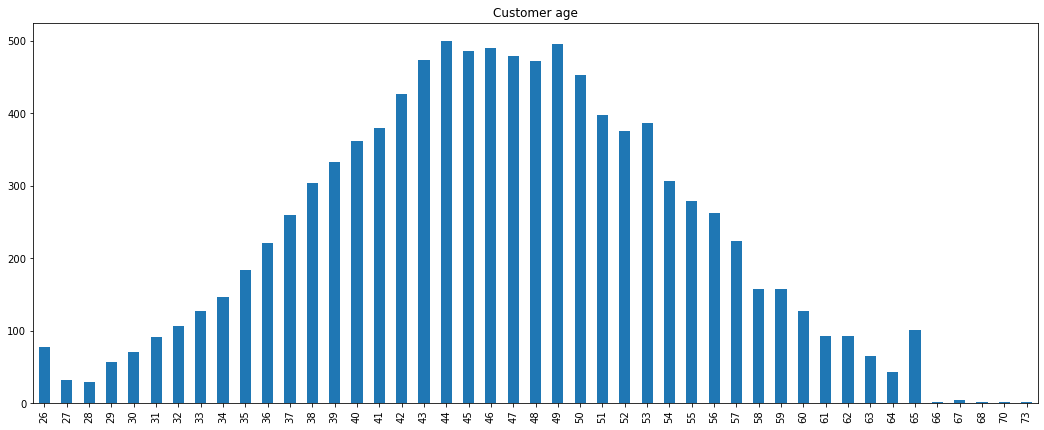

In [5]:
plt.rcParams["figure.figsize"] = (18, 7)
creditcard['Customer_Age'].value_counts().sort_index(ascending=True).plot(kind='bar', title='Customer age');

Veiem una distribució unimodal, simètrica, amb la mitja i mediana molt similars.

In [25]:
print('La moda de Customer_Age és: {0}'.format(creditcard['Customer_Age'].mode()[0]))
print('La mediana de Customer_Age és: {0}'.format(creditcard['Customer_Age'].median()))
print('La desviació standard de Customer_Age és: {0:.3f}'.format(creditcard['Customer_Age'].std()))
print('La mitjana de Customer_Age és: {0:.3f}'.format(creditcard['Customer_Age'].mean()))

La moda de Customer_Age és: 44
La mediana de Customer_Age és: 46.0
La desviació standard de Customer_Age és: 8.017
La mitjana de Customer_Age és: 46.326


## - Exercici 2
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

Calculo la correlació entre **Months_on_book** i **Customer_Age**

In [5]:
print('La correlació entre Customer_Age i Months_on_book es: {0:.3f}'.format(creditcard['Customer_Age'].corr(creditcard['Months_on_book'])))

La correlació entre Customer_Age i Months_on_book es: 0.789


Veiem el gràfic entre Customer Age i Months on book

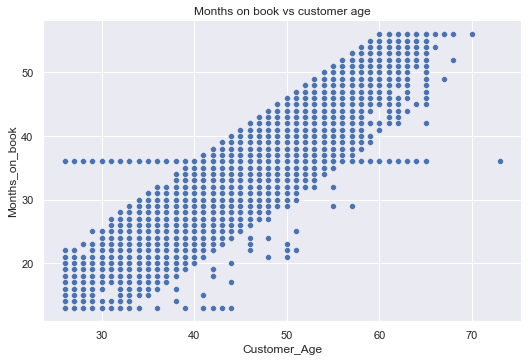

In [28]:
sns.relplot(x='Customer_Age', y='Months_on_book', data=creditcard, height=5, aspect=1.5).set(title='Months on book vs customer age');

Tant pel valor de correlació (0.789) com pel gràfic, podriem dir que Customer_Age i Months_on_book estan relacionades
Podem veure com fa 36 mesos aproximadament va haver una incorporació de nous clients i que van ser de totes les edats: podria ser una una campanya de captació de clients o una fusió o incorporació desde una altra entitat

## - Exercici 3

Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

In [5]:
matriu_corr=creditcard.corr()
matriu_corr

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Products,Months_Inactive,Contacts_Count,Credit_Limit,Revolving,Open_To_Buy,Transaction_Amount,Transaction_Count,Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,-0.019692,-0.002961,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.046446,-0.067097,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,0.025046,0.049912,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.038591,-0.049819,-0.007541
Total_Products,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,-0.347229,-0.241891,0.067663
Months_Inactive,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.036982,-0.042787,-0.007503
Contacts_Count,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.112774,-0.152213,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.171730,0.075927,-0.482965
Revolving,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.064370,0.056060,0.624022
Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.165923,0.070885,-0.538808


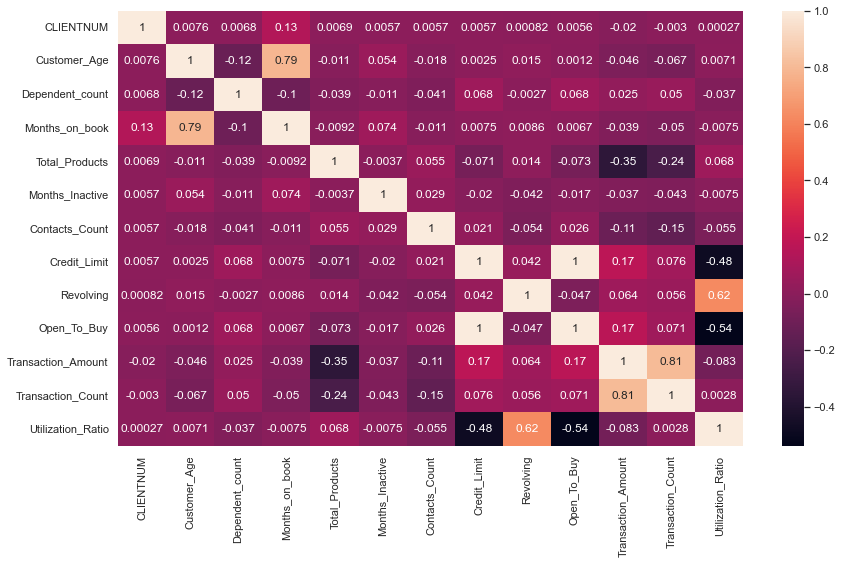

In [13]:
sns. set (rc = {"figure.figsize" :( 14, 8 )})
sns.heatmap(matriu_corr, annot=True);

A la matriu de correlacions busquem els valors de correlació propers a 1 i que no siguin els de la diagonal. Tenim:
- Open_To_Buy vs Credit_Limit: **0.996**
- Transaction_Count vs Transaction_Amount: **0.81**
- Months_on_book vs Customer_Age: **0.79**
- Utilization_Ratio vs Revolving: **0.62**  
La resta de correlacions són molt baixas, és a dir, que no hi ha correlació entre les variables.   
Veiem les correlacions gràficament

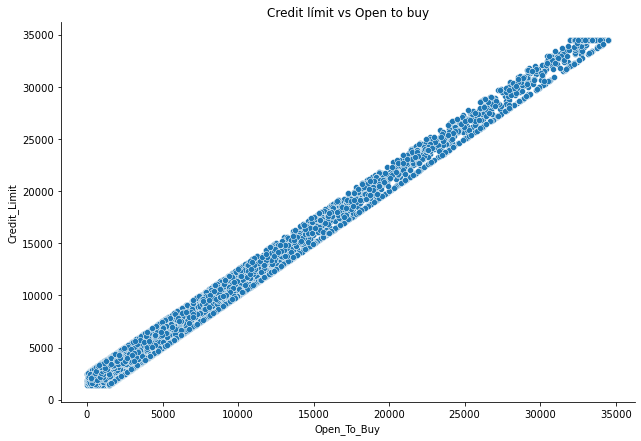

In [8]:
sns.relplot(x='Open_To_Buy', y='Credit_Limit', data=creditcard, height=6, aspect=1.5).set(title='Credit límit vs Open to buy');

Es veu una correlació quasi perfecta, amb uns límits del contorn molt ben marcats i on no hi ha punts fora. Podría ser perquè Open_To_Buy es tracta de promitjos dels últims 12 anys de ratis, però necessitaria tenir més informació d'aquest negoci bancari per poder interpretar-lo.

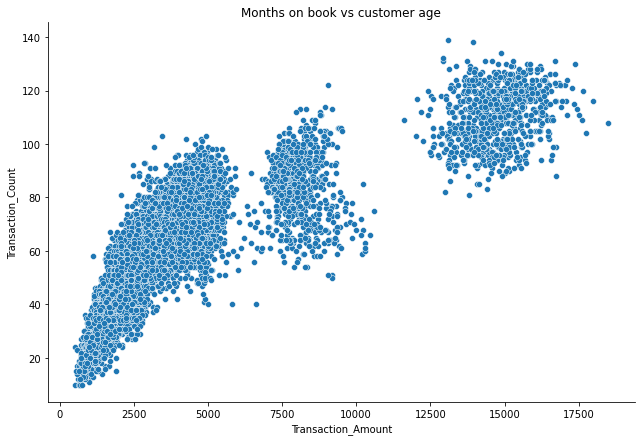

In [6]:
sns.relplot(x='Transaction_Amount', y='Transaction_Count', data=creditcard, height=6, aspect=1.5).set(title='Months on book vs customer age');

A més de certa correlació (0.81) veiem que té 3 zones prou diferenciades on trobem valors 

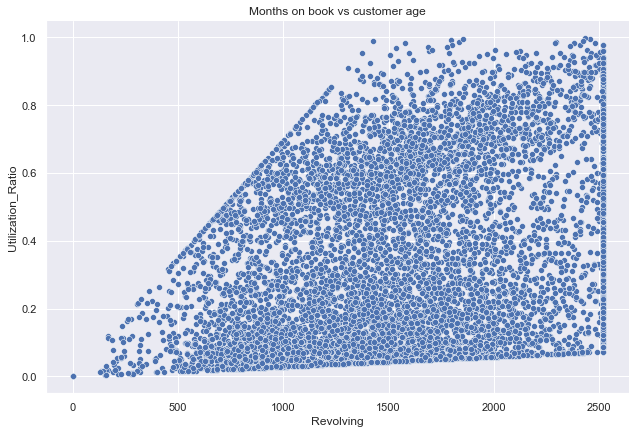

In [23]:
sns.relplot(y='Utilization_Ratio', x='Revolving', data=creditcard, height=6, aspect=1.5).set(title='Months on book vs customer age');

Veiem que hi ha contorns ben definits, és a dir, tots els valors sense excepció es troben dintre dels contorns que són lineals, 

El gràfic **Months_on_book vs Customer_Age** ja l'hem fet a l'excercici 2